## Collect dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
file = r'dataset\features\EURUSD.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [2]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
targets = df[['open_24', 'close_24']].copy()*10000


## Normalize data & Split data

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(features.values)
y = sc_y.fit_transform(targets.values)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05)

y_train

array([[-0.13298016, -0.1055724 ],
       [-0.24579333, -0.24394251],
       [-0.82827766, -0.83356956],
       ...,
       [-0.29897668, -0.2883775 ],
       [-0.54279127, -0.53380602],
       [-0.60748617, -0.61968298]])

In [4]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

open 0: 1915593.126751
high 1: 1942816.024946
low 2: 1971106.271889
close 3: 2003986.577490
WPC 27: 1999394.806351
HA_open 37: 1847551.270095
HA_high 38: 1917042.419584
HA_low 39: 1952149.172033
HA_close 40: 1983097.170090
EMA_4 53: 1949881.122679
EMA_8 54: 1861905.983378
EMA_16 55: 1705508.613496
EMA_32 56: 1462846.211808
bb_bbm_4 57: 1921316.268247
bb_bbh_4 58: 1797666.983451
bb_bbl_4 59: 1845865.457360
bb_bbm_8 60: 1808838.520388
bb_bbh_8 61: 1617973.886572
bb_bbl_8 62: 1689716.316887
bb_bbm_16 63: 1618815.717475
bb_bbh_16 64: 1374320.078878
bb_bbl_16 65: 1459706.137629
bb_bbm_32 66: 1340598.323658
bb_bbh_32 67: 1085613.484260
bb_bbl_32 68: 1159095.445578


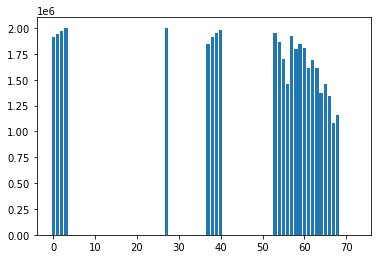

In [5]:
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(x_train, y_train[:,0], x_test)
fea = features.columns.values
features_selection = []
for i in range(len(fs.scores_)):
	if fs.scores_[i] > 10000:
		features_selection.append(fea[i])
		print('%s %d: %f' % (fea[i],i, fs.scores_[i]))
	
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
features_selection

['open',
 'high',
 'low',
 'close',
 'WPC',
 'HA_open',
 'HA_high',
 'HA_low',
 'HA_close',
 'EMA_4',
 'EMA_8',
 'EMA_16',
 'EMA_32',
 'bb_bbm_4',
 'bb_bbh_4',
 'bb_bbl_4',
 'bb_bbm_8',
 'bb_bbh_8',
 'bb_bbl_8',
 'bb_bbm_16',
 'bb_bbh_16',
 'bb_bbl_16',
 'bb_bbm_32',
 'bb_bbh_32',
 'bb_bbl_32']